In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!ls -lh {HOME}/weights

total 408M
-rw-r--r-- 1 root root  80M May 26  2024 yolov10b.pt
-rw-r--r-- 1 root root 100M May 26  2024 yolov10l.pt
-rw-r--r-- 1 root root  64M May 26  2024 yolov10m.pt
-rw-r--r-- 1 root root  11M May 26  2024 yolov10n.pt
-rw-r--r-- 1 root root  32M May 26  2024 yolov10s.pt
-rw-r--r-- 1 root root 123M May 26  2024 yolov10x.pt


In [ ]:
!pip install albumentations==1.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.20
    Uninstalling albumentations-1.4.20:
      Successfully uninstalled albumentations-1.4.20


DATASET

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="cwe2fWo93RhU5374irsD")
project = rf.workspace("microsoft").project("coco")
version = project.version(3)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to COCO-Dataset-3 in yolov8:: 100%|██████████| 244126/244126 [01:25<00:00, 2871.22it/s]


In [ ]:
!yolo task=detect mode=train epochs=1 batch=32 plots=True \
model={HOME}/weights/yolov10n.pt \
data=/content/COCO-Dataset-3/data.yaml

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
New https://py

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1733065532.e1edfeadf5cf.2283.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


/content


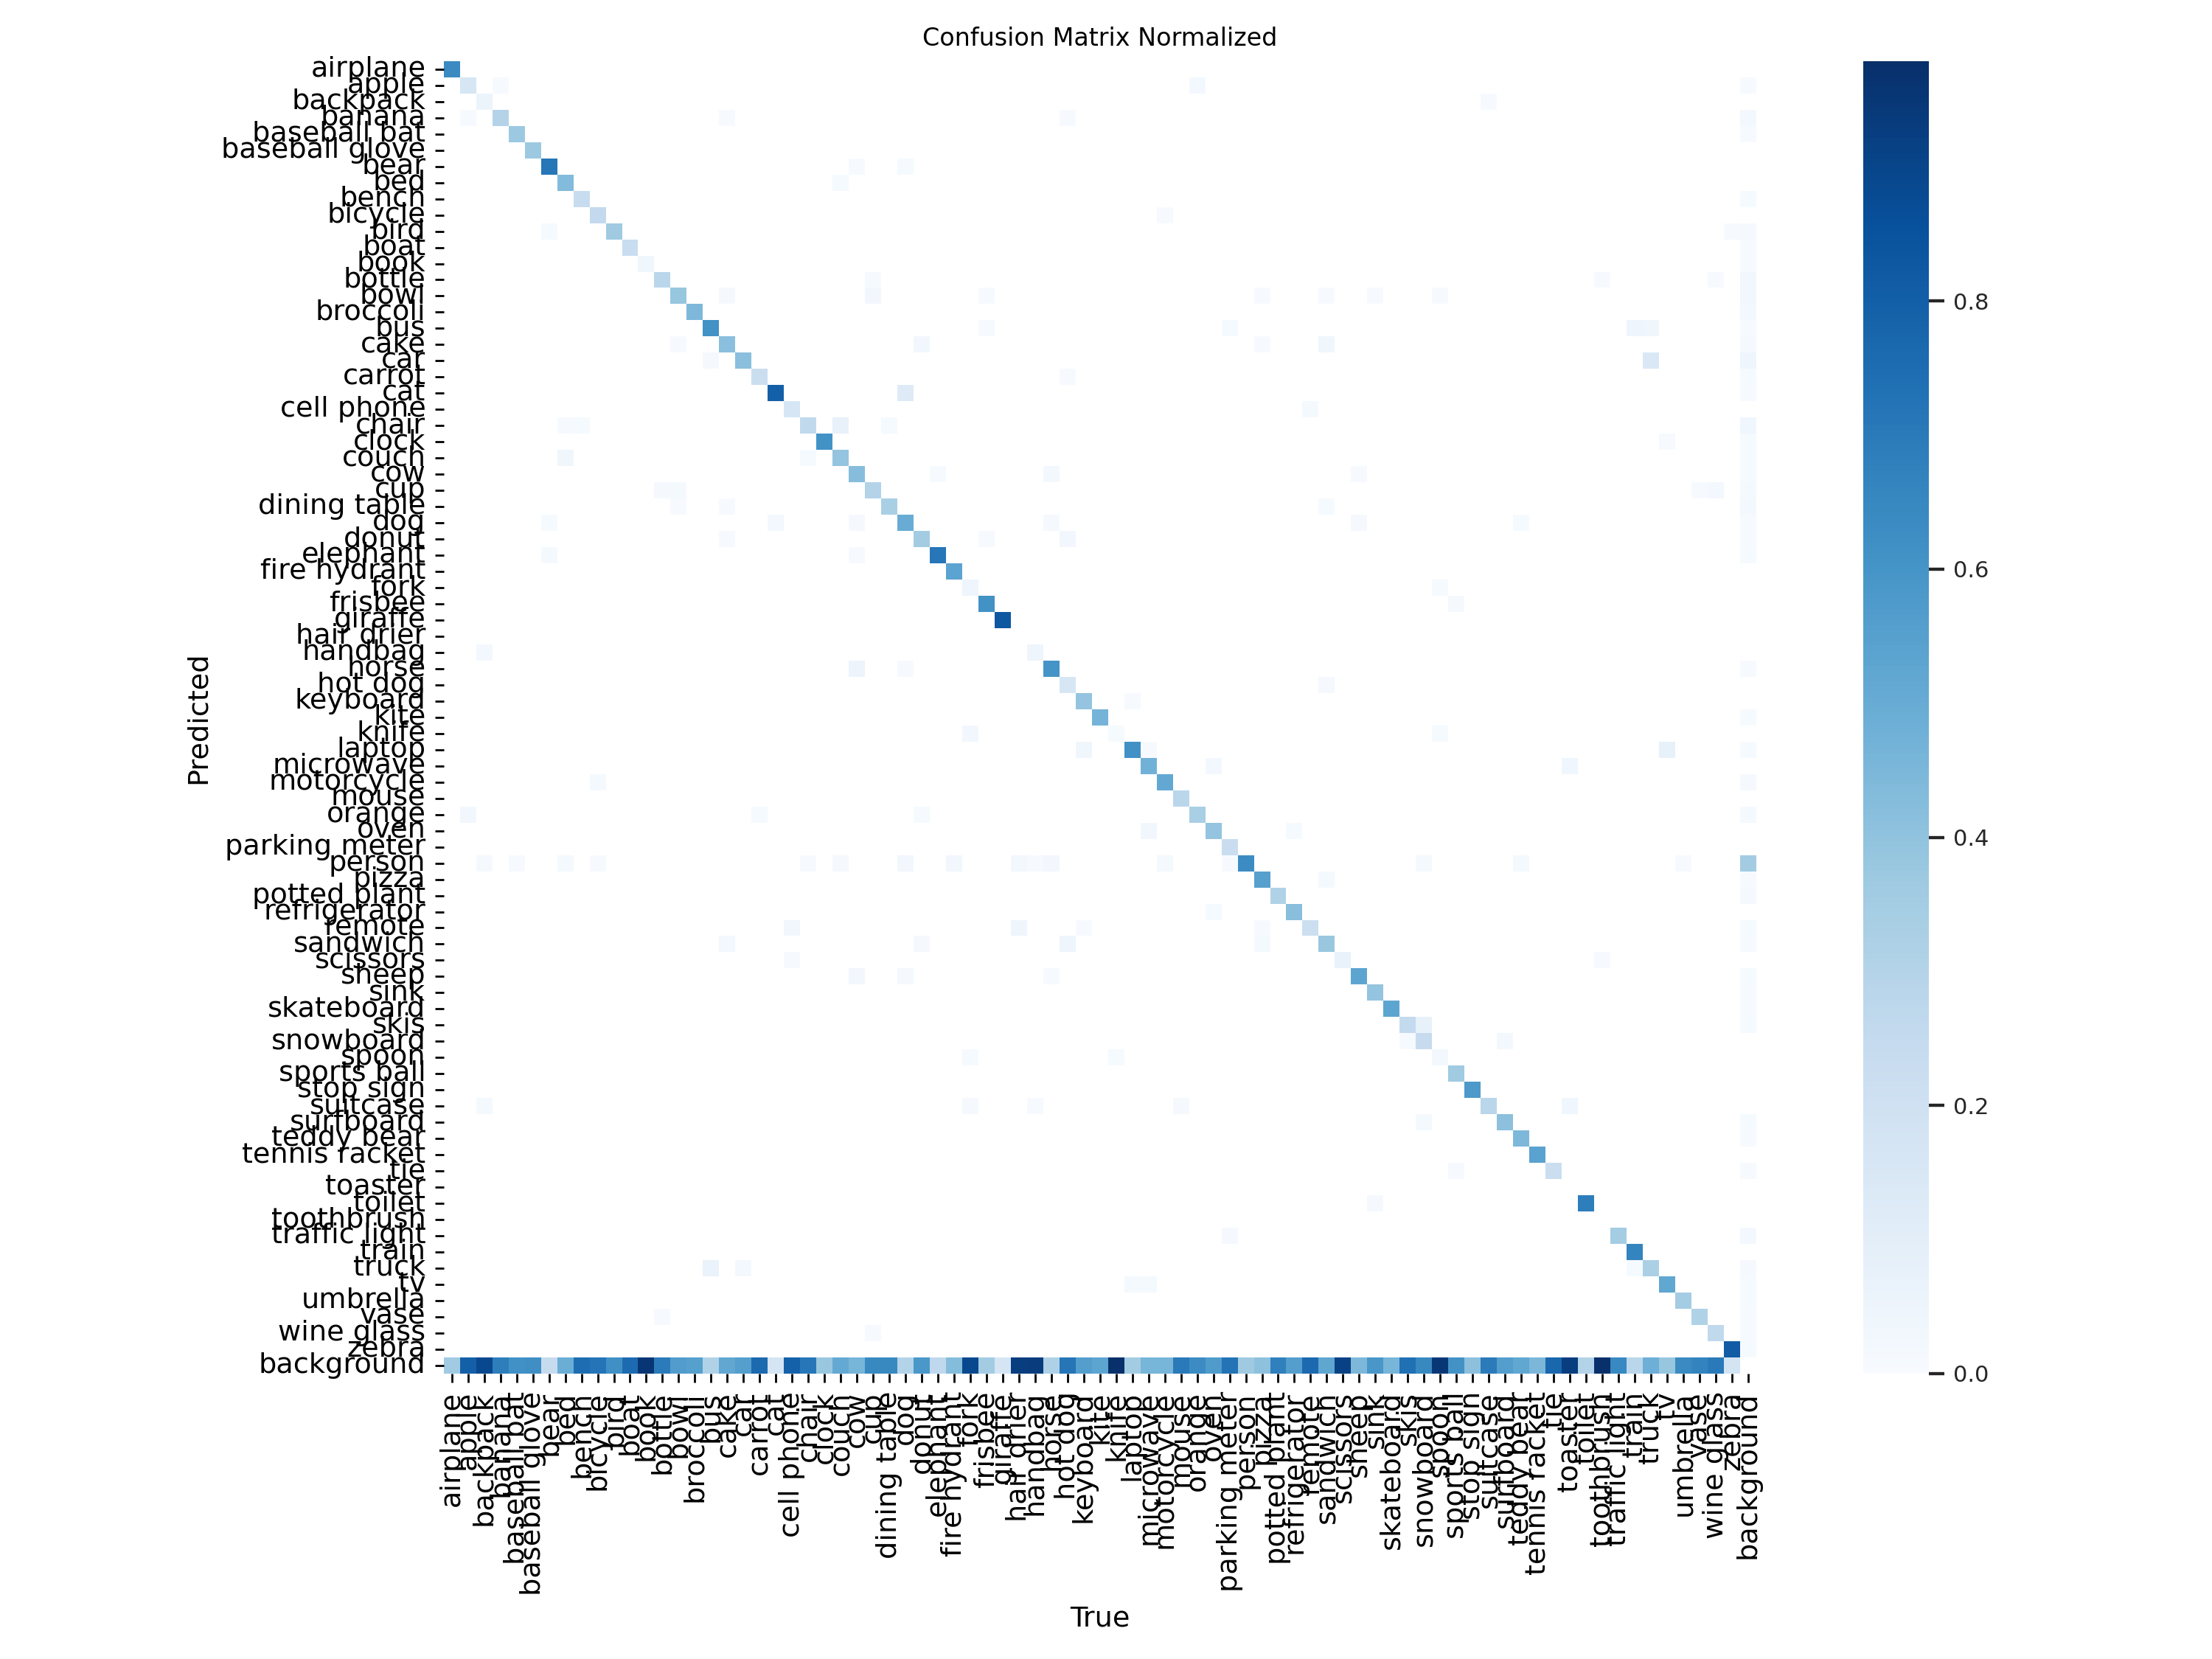

In [ ]:
from IPython.display import Image
%cd {HOME}
Image(filename='/content/runs/detect/train/confusion_matrix_normalized.png', width=600)


image 1/1 /content/COCO-Dataset-3/test/images/000000150685_jpg.rf.4910def53e8e7d2d9fc9abfce6043f96.jpg: 640x640 3 apples, 1 bowl, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/COCO-Dataset-3/test/images/000000239158_jpg.rf.52ef8d6706c7f5248728ae0e760f2a8e.jpg: 640x640 1 dog, 1 suitcase, 10.2ms
Speed: 1.6ms preprocess, 10.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/COCO-Dataset-3/test/images/000000432742_jpg.rf.409fc8f1904d4f159b3ac128e10f67c5.jpg: 640x640 1 chair, 4 persons, 9.4ms
Speed: 1.5ms preprocess, 9.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/COCO-Dataset-3/test/images/000000551559_jpg.rf.64ba9af7eec205a4cf09cc3632b95dd7.jpg: 640x640 1 zebra, 9.4ms
Speed: 1.3ms preprocess, 9.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/COCO-Dataset-3/test/images/000000532714_jpg.rf.ab1

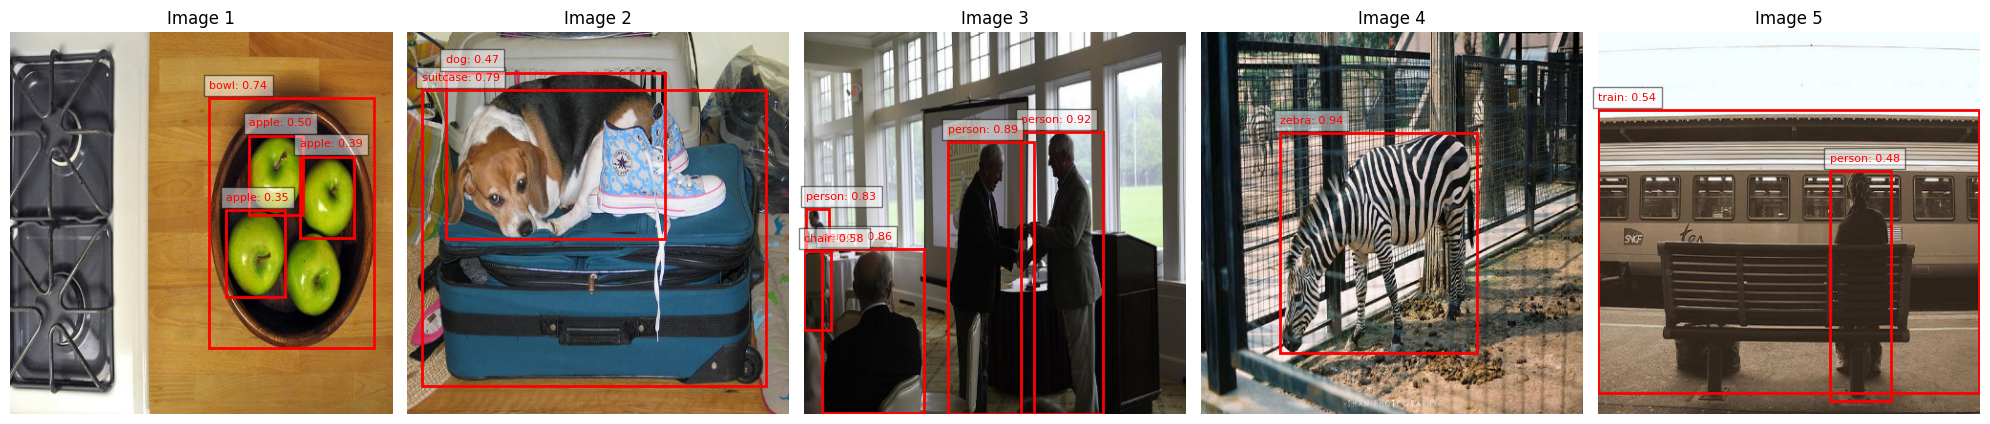

In [ ]:
import random
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLOv10  # Import the YOLOv10 model

# Load the YOLO model
model = YOLOv10('/content/runs/detect/train/weights/best.pt')  # Replace with your model path

# Path to validation dataset images
valid_dataset_path = '/content/COCO-Dataset-3/test/images'  # Replace with the correct path

# List all validation images
valid_images = [os.path.join(valid_dataset_path, img) for img in os.listdir(valid_dataset_path) if img.endswith(('jpg', 'jpeg', 'png'))]

# Select 5 random images from the validation set
random_images_paths = random.sample(valid_images, 5)

# Resize dimensions
resize_width = 400
resize_height = 400

# Create a figure for grid display
fig, axes = plt.subplots(1, 5, figsize=(20, 10))  # Grid with 1 row and 5 columns

# Loop through each randomly selected image
for idx, (image_path, ax) in enumerate(zip(random_images_paths, axes)):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for plotting
    image_resized = cv2.resize(image_rgb, (resize_width, resize_height))  # Resize image

    # Perform inference
    results = model.predict(source=image_path, conf=0.25)  # Perform prediction

    # Extract results (bounding boxes, confidences, and class labels)
    boxes = results[0].boxes.xyxy.cpu().numpy()  # Bounding box coordinates
    confidences = results[0].boxes.conf.cpu().numpy()  # Confidence scores
    class_ids = results[0].boxes.cls.cpu().numpy()  # Class ids

    # Get class names from the model (you can customize this based on your dataset)
    class_names = model.names  # Model class names

    # Plot the resized image
    ax.imshow(image_resized)
    ax.axis('off')  # Turn off axis for cleaner display

    # Loop through the detected objects and annotate
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = box.astype(int)
        confidence = confidences[i]
        class_id = int(class_ids[i])
        label = f"{class_names[class_id]}: {confidence:.2f}"

        # Scale bounding box coordinates to match the resized image
        x1 = int(x1 * resize_width / image.shape[1])
        x2 = int(x2 * resize_width / image.shape[1])
        y1 = int(y1 * resize_height / image.shape[0])
        y2 = int(y2 * resize_height / image.shape[0])

        # Draw the bounding box
        ax.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='red', linewidth=2, fill=False))

        # Add the label
        ax.text(x1, y1 - 10, label, color='red', fontsize=8, bbox=dict(facecolor='white', alpha=0.5))

    # Add a title for each image
    ax.set_title(f"Image {idx + 1}")

# Adjust layout and display the grid
plt.tight_layout()
plt.show()
